In [1]:
import pandas as pd
import numpy as np
import torch
import tqdm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipykernel_3060397/2677601207.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
all_dicts = dict()
for key in tqdm.tqdm(["kreed", "kreedXL_dps", "kreedXL_proj", "kreedXL", "random", "stiefelFM_logitnormal_OT", "stiefelFM_logitnormal", "stiefelFM_OT", "stiefelFM_stoch10", "stiefelFM"]):
    all_dicts[key] = torch.load(f"../../samples/qm9/{key}.pt")

key_to_name = {
    "random": "Stiefel Random",
    "kreed": "KREED",
    "kreedXL": "KREED-XL",
    "kreedXL_dps": "KREED-XL-DPS",
    "kreedXL_proj": "KREED-XL-proj",
    "stiefelFM": "Stiefel FM",
    "stiefelFM_OT": "Stiefel FM-OT",
    "stiefelFM_stoch10": "Stiefel FM-stoch",
    "stiefelFM_logitnormal": "Stiefel FM-ln",
    "stiefelFM_logitnormal_OT": "Stiefel FM-ln-OT",
}

100%|██████████| 10/10 [00:47<00:00,  4.75s/it]


In [3]:
rows = []
for ckpt in tqdm.tqdm(all_dicts):
    for test_set_idx in all_dicts[ckpt]:
        for sample_idx in range(10):
            d = dict(all_dicts[ckpt][test_set_idx][sample_idx])
            d["num_atoms"] = d["coords"].shape[0]
            d.pop("coords", None)
            d["ckpt"] = ckpt
            d["test_set_idx"] = test_set_idx
            d["sample_idx"] = sample_idx
            rows.append(d)


df = pd.DataFrame(rows)

df["log_grad_norm"] = np.log10(df.grad_norm)
df["rmsd_below_25"] = df.coord_rmse < 0.25
df["rmsd_below_10"] = df.coord_rmse < 0.10

df.to_csv("qm9_results.csv", index=False)

df

100%|██████████| 10/10 [00:03<00:00,  2.59it/s]


,moments_rmse,validity,correctness,heavy_correctness,coord_rmse,heavy_coord_rmse,grad_norm,energy,diversity,num_atoms,ckpt,test_set_idx,sample_idx,log_grad_norm,rmsd_under_pt10,rmsd_under_pt25,curve_length,rmsd_below_25,rmsd_below_10
0,7.272682,1.0,0.0,0.0,1.295973,1.167422,0.022348,-30.123811,1.370732,19,kreed,0,0,-1.650770,NaN,NaN,NaN,False,False
1,7.994607,1.0,0.0,0.0,1.332535,1.031816,0.033684,-30.122736,1.370732,19,kreed,0,1,-1.472574,NaN,NaN,NaN,False,False
2,6.853423,1.0,0.0,0.0,1.466562,1.157666,0.023832,-30.101162,1.370732,19,kreed,0,2,-1.622831,NaN,NaN,NaN,False,False
3,6.670238,1.0,0.0,0.0,1.449593,1.409840,0.148005,-29.821534,1.370732,19,kreed,0,3,-0.829724,NaN,NaN,NaN,False,False
4,5.762773,1.0,0.0,0.0,1.230849,1.132308,0.038280,-30.095262,1.370732,19,kreed,0,4,-1.417029,NaN,NaN,NaN,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1303295,0.000002,0.0,0.0,0.0,1.634639,1.580050,0.258750,-28.551454,1.271851,21,stiefelFM,13032,5,-0.587120,0.0,0.0,1.597990,False,False
1303296,0.000002,1.0,0.0,0.0,1.523923,1.377524,0.041497,-28.861147,1.271851,21,stiefelFM,13032,6,-1.381982,0.0,0.0,1.736804,False,False
1303297,0.000001,1.0,0.0,0.0,1.704524,1.717267,0.125104,-28.793129,1.271851,21,stiefelFM,13032,7,-0.902728,0.0,0.0,1.749042,False,False
1303298,0.000001,0.0,0.0,0.0,1.474647,1.451749,0.138045,-28.669593,1.271851,21,stiefelFM,13032,8,-0.859979,0.0,0.0,1.785340,False,False


In [4]:
# df = pd.read_csv("qm9_results.csv")

In [5]:
# Table 1

table_rows = []
order = ['random', 'kreed', 'kreedXL', 'kreedXL_dps', 'kreedXL_proj', 'stiefelFM', 'stiefelFM_OT']
for ckpt in order:
    name = key_to_name[ckpt]
    table_rows.append([name])

grouped = df.groupby(['test_set_idx', 'ckpt'])

means = grouped.max().rmsd_below_25.groupby('ckpt').mean()
sems = grouped.max().rmsd_below_25.groupby('ckpt').sem()
for i, ckpt in enumerate(order):
    table_rows[i].append(f"{(means[ckpt]*100):.2f} $\\pm$ {sems[ckpt]*100:.2f}")

means = grouped.max().rmsd_below_10.groupby('ckpt').mean()
sems = grouped.max().rmsd_below_10.groupby('ckpt').sem()
for i, ckpt in enumerate(order):
    table_rows[i].append(f"{(means[ckpt]*100):.2f} $\\pm$ {sems[ckpt]*100:.2f}")

means = grouped.mean().moments_rmse.groupby('ckpt').mean()
for i, ckpt in enumerate(order):
    table_rows[i].append(f"{means[ckpt]:.2f}")

means = grouped.mean().validity.groupby('ckpt').mean()
for i, ckpt in enumerate(order):
    table_rows[i].append(f"{means[ckpt]:.3f}")

means = grouped.mean().log_grad_norm.groupby('ckpt').mean()
for i, ckpt in enumerate(order):
    table_rows[i].append(f"{means[ckpt]:.3f}")

means = grouped.mean().diversity.groupby('ckpt').mean()
for i, ckpt in enumerate(order):
    table_rows[i].append(f"{means[ckpt]:.3f}")

row = ["Method", "(% < 0.25 Å)", "(% < 0.10 Å)", "Error", "Valid", "Stable", "Diverse"]
print("| " + " | ".join(row) + " |")
print("| " + " | ".join(["---"]*len(row)) + " |")
for row in table_rows:
    print("| " + " | ".join(row) + " |")

| Method | (% < 0.25 Å) | (% < 0.10 Å) | Error | Valid | Stable | Diverse |
| --- | --- | --- | --- | --- | --- | --- |
| Stiefel Random | 0.00 $\pm$ 0.00 | 0.00 $\pm$ 0.00 | 0.00 | 0.061 | 0.000 | 2.640 |
| KREED | 11.22 $\pm$ 0.28 | 9.55 $\pm$ 0.26 | 5.18 | 0.878 | -1.335 | 1.429 |
| KREED-XL | 13.65 $\pm$ 0.30 | 10.94 $\pm$ 0.27 | 3.64 | 0.933 | -1.048 | 0.870 |
| KREED-XL-DPS | 12.36 $\pm$ 0.29 | 9.40 $\pm$ 0.26 | 1.33 | 0.744 | -0.826 | 1.060 |
| KREED-XL-proj | 13.67 $\pm$ 0.30 | 10.93 $\pm$ 0.27 | 0.00 | 0.924 | -0.905 | 0.871 |
| Stiefel FM | 15.17 $\pm$ 0.31 | 13.82 $\pm$ 0.30 | 0.00 | 0.882 | -1.125 | 1.040 |
| Stiefel FM-OT | 13.99 $\pm$ 0.30 | 12.68 $\pm$ 0.29 | 0.00 | 0.835 | -1.039 | 1.045 |


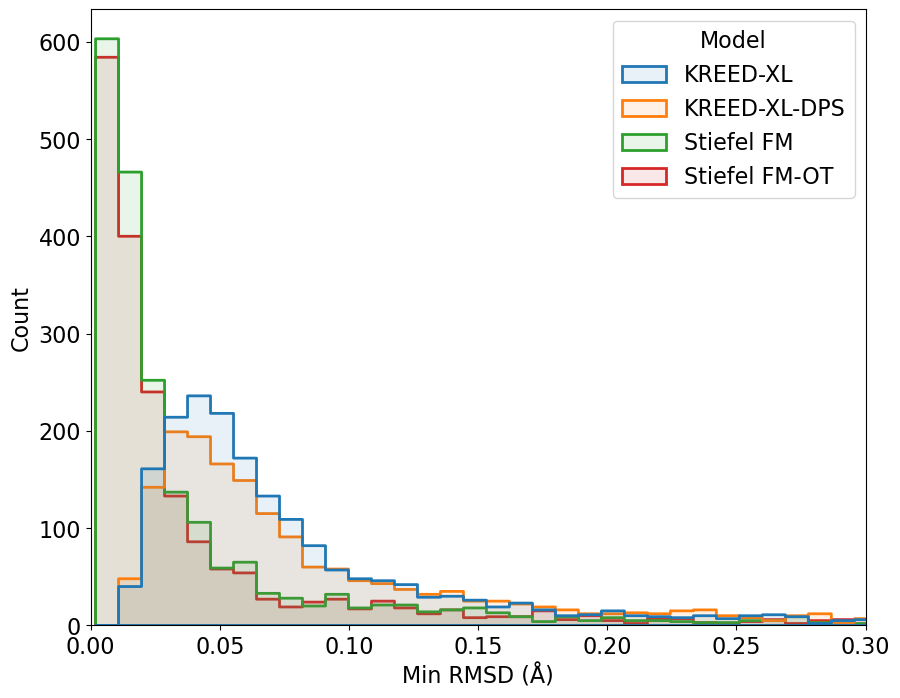

In [6]:
# Figure 2

order = ["kreedXL", "kreedXL_dps", "stiefelFM", "stiefelFM_OT"]

subdf = df[df.ckpt.isin(order)][["coord_rmse", "ckpt", "test_set_idx"]]
subdf = subdf.reset_index(drop=True)
subdf = subdf.groupby(["test_set_idx", "ckpt"]).min().reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 8))

# increase font size
plt.rcParams.update({'font.size': 16})

hue_order = [key_to_name[ckpt] for ckpt in order]
subdf["Model"] = subdf["ckpt"].map(key_to_name)
# Plot histogram of coord_rmse with different ckpt on the same plot
sns.histplot(data=subdf, x="coord_rmse", hue="Model", bins=400, kde=False, palette="tab10", element="step", fill=True, alpha=0.1, hue_order=hue_order, linewidth=2)

# Add labels and title
plt.xlabel("Min RMSD (Å)")
plt.ylabel("Count")

plt.savefig("qm9_rmsd_hist.png", bbox_inches='tight', dpi=300)

# Set x-axis limits
plt.xlim([0, 0.3])

plt.savefig("qm9_rmsd_hist_zoom.png", bbox_inches='tight', dpi=300)

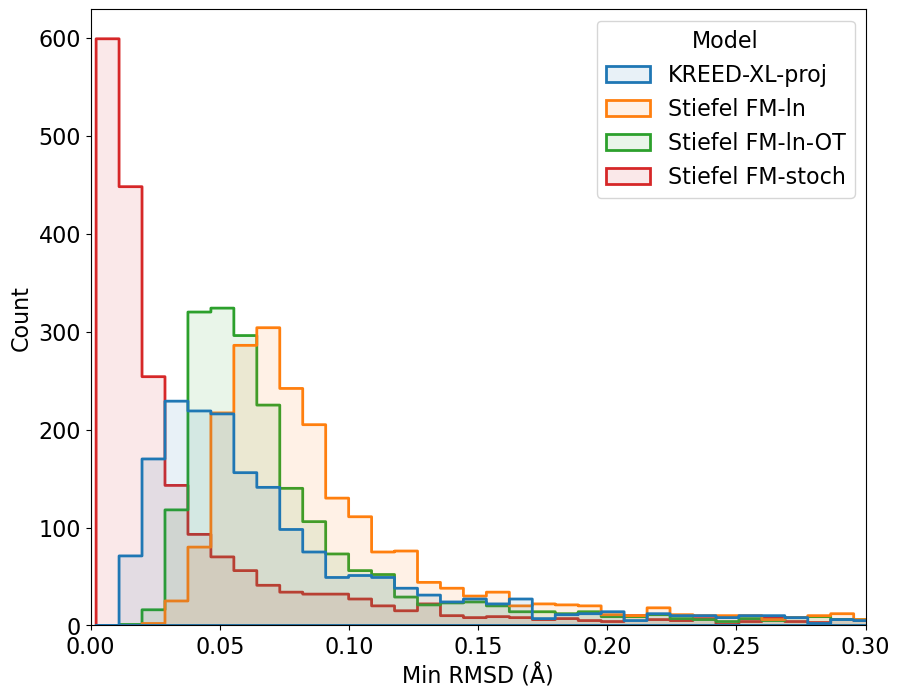

In [7]:
# extra

order = ["kreedXL_proj", "stiefelFM_logitnormal", "stiefelFM_logitnormal_OT", "stiefelFM_stoch10"]

subdf = df[df.ckpt.isin(order)][["coord_rmse", "ckpt", "test_set_idx"]]
subdf = subdf.reset_index(drop=True)
subdf = subdf.groupby(["test_set_idx", "ckpt"]).min().reset_index()

# Create a figure and axis
plt.figure(figsize=(10, 8))

# increase font size
plt.rcParams.update({'font.size': 16})

hue_order = [key_to_name[ckpt] for ckpt in order]
subdf["Model"] = subdf["ckpt"].map(key_to_name)
# Plot histogram of coord_rmse with different ckpt on the same plot
sns.histplot(data=subdf, x="coord_rmse", hue="Model", bins=400, kde=False, palette="tab10", element="step", fill=True, alpha=0.1, hue_order=hue_order, linewidth=2)

# Add labels and title
plt.xlabel("Min RMSD (Å)")
plt.ylabel("Count")

# Set x-axis limits
plt.xlim([0, 0.3]);

In [8]:
grouped = df.groupby(['test_set_idx', 'ckpt'])
means = grouped.mean().curve_length.groupby('ckpt').mean()

print(f"Stiefel FM curve length: {means.stiefelFM:.3f}")
print(f"Stiefel FM-OT curve length: {means.stiefelFM_OT:.3f}")

means

Stiefel FM curve length: 1.696
Stiefel FM-OT curve length: 1.547


ckpt
kreed                            NaN
kreedXL                          NaN
kreedXL_dps                      NaN
kreedXL_proj                     NaN
random                           NaN
stiefelFM                   1.696159
stiefelFM_OT                1.547397
stiefelFM_logitnormal       1.687639
stiefelFM_logitnormal_OT    1.554110
stiefelFM_stoch10           5.507808
Name: curve_length, dtype: float64

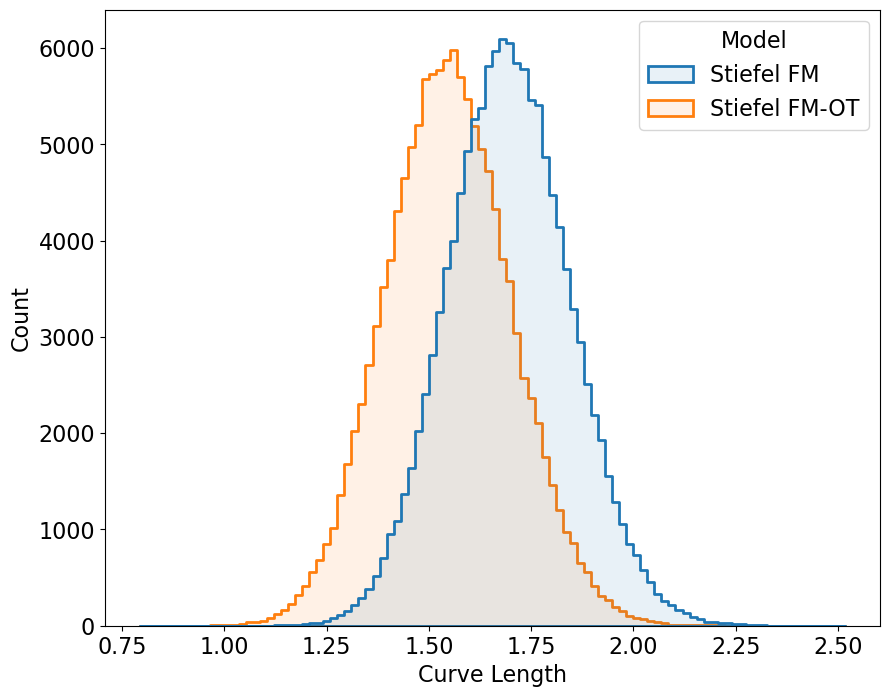

In [9]:
# Figure 3, right

plt.figure(figsize=(10, 8))

keep = ["stiefelFM", "stiefelFM_OT"]
hue_order = [key_to_name[ckpt] for ckpt in keep]

subdf = df[df.ckpt.isin(keep)][["curve_length", "ckpt", "test_set_idx"]]
subdf = subdf.reset_index(drop=True)

subdf["Model"] = subdf["ckpt"].map(key_to_name)

# Plot histogram of coord_rmse with different ckpt on the same plot
sns.histplot(data=subdf, x="curve_length", hue="Model", bins=100, kde=False, palette="tab10", element="step", fill=True, alpha=0.1, hue_order=hue_order, linewidth=2)

# Add labels and title
plt.xlabel("Curve Length")
plt.ylabel("Count")

plt.savefig("qm9_curve_length.png", bbox_inches='tight', dpi=300)

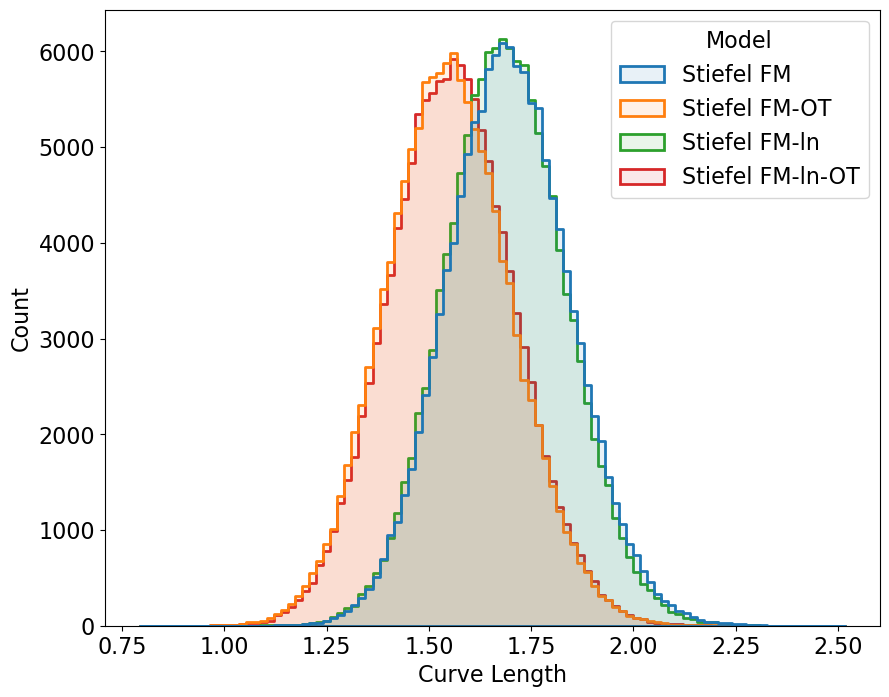

In [10]:
# extra

plt.figure(figsize=(10, 8))

keep = ["stiefelFM", "stiefelFM_OT", "stiefelFM_logitnormal", "stiefelFM_logitnormal_OT"]
hue_order = [key_to_name[ckpt] for ckpt in keep]

subdf = df[df.ckpt.isin(keep)][["curve_length", "ckpt", "test_set_idx"]]
subdf = subdf.reset_index(drop=True)

subdf["Model"] = subdf["ckpt"].map(key_to_name)

# Plot histogram of coord_rmse with different ckpt on the same plot
sns.histplot(data=subdf, x="curve_length", hue="Model", bins=100, kde=False, palette="tab10", element="step", fill=True, alpha=0.1, hue_order=hue_order, linewidth=2)

# Add labels and title
plt.xlabel("Curve Length")
plt.ylabel("Count");

In [11]:
# Table 5

table_rows = []
order = ['stiefelFM', 'stiefelFM_OT', 'stiefelFM_stoch10', 'stiefelFM_logitnormal', 'stiefelFM_logitnormal_OT']
for ckpt in order:
    name = key_to_name[ckpt]
    table_rows.append([name])

grouped = df.groupby(['test_set_idx', 'ckpt'])

means = grouped.max().rmsd_below_25.groupby('ckpt').mean()
sems = grouped.max().rmsd_below_25.groupby('ckpt').sem()
for i, ckpt in enumerate(order):
    table_rows[i].append(f"{(means[ckpt]*100):.2f} $\\pm$ {sems[ckpt]*100:.2f}")

means = grouped.max().rmsd_below_10.groupby('ckpt').mean()
sems = grouped.max().rmsd_below_10.groupby('ckpt').sem()
for i, ckpt in enumerate(order):
    table_rows[i].append(f"{(means[ckpt]*100):.2f} $\\pm$ {sems[ckpt]*100:.2f}")

means = grouped.mean().moments_rmse.groupby('ckpt').mean()
for i, ckpt in enumerate(order):
    table_rows[i].append(f"{means[ckpt]:.2f}")

means = grouped.mean().validity.groupby('ckpt').mean()
for i, ckpt in enumerate(order):
    table_rows[i].append(f"{means[ckpt]:.3f}")

means = grouped.mean().log_grad_norm.groupby('ckpt').mean()
for i, ckpt in enumerate(order):
    table_rows[i].append(f"{means[ckpt]:.3f}")

means = grouped.mean().diversity.groupby('ckpt').mean()
for i, ckpt in enumerate(order):
    table_rows[i].append(f"{means[ckpt]:.3f}")

row = ["Method", "(% < 0.25 Å)", "(% < 0.10 Å)", "Error", "Valid", "Stable", "Diverse"]
print("| " + " | ".join(row) + " |")
print("| " + " | ".join(["---"]*len(row)) + " |")
for row in table_rows:
    print("| " + " | ".join(row) + " |")

| Method | (% < 0.25 Å) | (% < 0.10 Å) | Error | Valid | Stable | Diverse |
| --- | --- | --- | --- | --- | --- | --- |
| Stiefel FM | 15.17 $\pm$ 0.31 | 13.82 $\pm$ 0.30 | 0.00 | 0.882 | -1.125 | 1.040 |
| Stiefel FM-OT | 13.99 $\pm$ 0.30 | 12.68 $\pm$ 0.29 | 0.00 | 0.835 | -1.039 | 1.045 |
| Stiefel FM-stoch | 15.13 $\pm$ 0.31 | 13.83 $\pm$ 0.30 | 0.00 | 0.877 | -1.116 | 1.045 |
| Stiefel FM-ln | 15.74 $\pm$ 0.32 | 11.45 $\pm$ 0.28 | 0.00 | 0.880 | -0.600 | 0.982 |
| Stiefel FM-ln-OT | 14.90 $\pm$ 0.31 | 12.45 $\pm$ 0.29 | 0.00 | 0.875 | -0.687 | 1.026 |


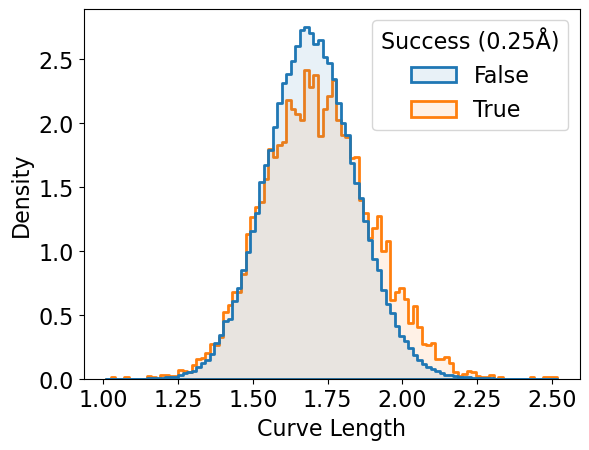

In [12]:
# Figure 7, left
plt.rcParams.update({'font.size': 16})
df["Success (0.25Å)"] = df.coord_rmse < 0.25
sns.histplot(df[df.ckpt == "stiefelFM"], x="curve_length", hue="Success (0.25Å)", element="step", fill=True, alpha=0.1, bins=100, linewidth=2, stat="density", common_norm=False)
plt.xlabel("Curve Length")
plt.savefig("qm9_biased.pdf", bbox_inches='tight')

In [13]:
num = len(set(df[df.ckpt.isin(["kreedXL", "stiefelFM", "stiefelFM_OT"]) & (df.coord_rmse < 0.25)].test_set_idx))
den = len(set(df.test_set_idx))
print(f"Combined success rate: {num}/{den} = {num/den}")

Combined success rate: 3580/13033 = 0.27468733215683266
